# Matplotlib Quiz

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
# 그래프 작성 옵션 값 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = {'영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
        '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
        '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
        '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
        }

df = pd.DataFrame(data)

### x축은 영화, y축은 평점인 막대 그래프 작성 (세부 정보 작성)

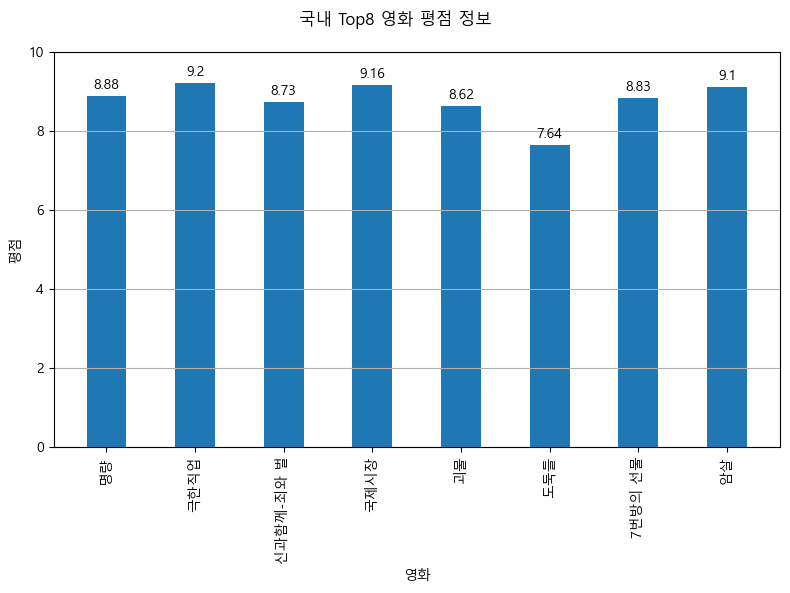

In [144]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 100)

rects = ax.bar(df['영화'], df['평점'],
               width = 0.45)

def auto_label(rects):
    for rect in rects:
        ax.annotate(rect.get_height(),
                    xy = ((rect.get_x() + rect.get_width()/2), rect.get_height()),
                    xytext = (0, 3),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')
auto_label(rects)

fig.suptitle('국내 Top8 영화 평점 정보')
ax.set(xlabel = '영화', ylabel = '평점')
ax.set_xticks(np.arange(len(df['영화'])))
ax.set_xticklabels(df['영화'], rotation = 90, ha = 'center')
ax.grid(axis = 'y')
ax.set_ylim(0, 10)

fig.tight_layout()
plt.show()

### 개봉 연도별 평점 변화 추이를 꺾은선 그래프로 그리기

In [79]:
score_df = df.groupby('개봉 연도').mean()

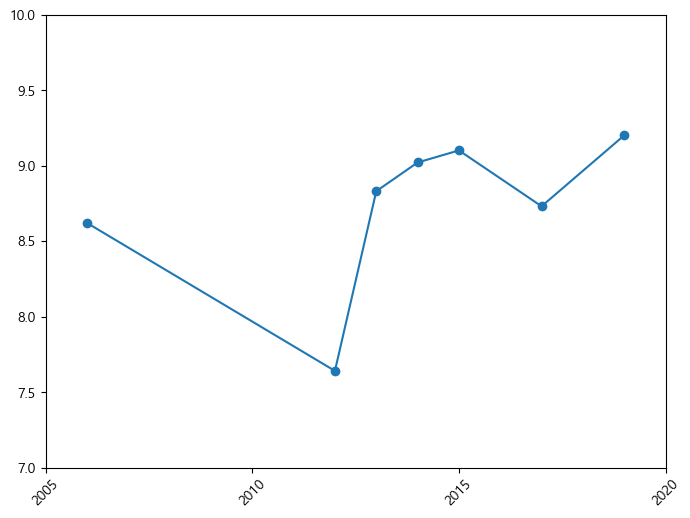

In [104]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 100)

ax.plot(score_df.index, score_df['평점'],
        marker = 'o')

ax.set_ylim(7, 10)
ax.set_xticks([2005, 2010, 2015, 2020])
ax.set_xticklabels([2005, 2010, 2015, 2020], rotation = 45)

plt.show()

### 평점이 9점 이상인 영화의 비율

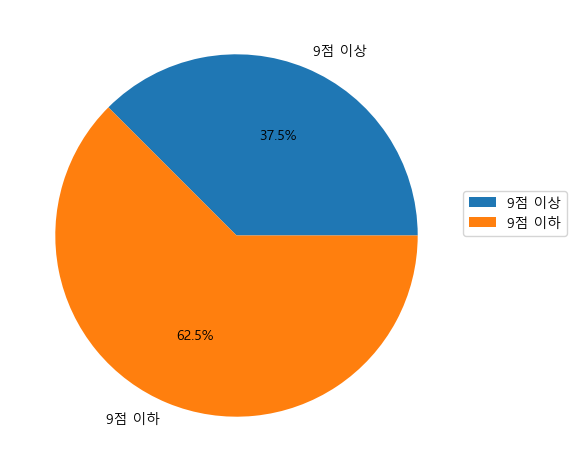

In [139]:
df['9점'] = df['평점'].apply(lambda x: x>=9)

index = list(df.groupby('9점').size().index)
values = list(df.groupby('9점').size().values)

fig, ax = plt.subplots(figsize = (8, 6), dpi = 100)

ax.pie(sorted(values),
       labels = ['9점 이상', '9점 미만'],
       autopct = '%.1f%%',)

ax.legend(loc = (1, 0.5))

plt.show()

,영화,개봉 연도,관객 수,평점,9점
1,극한직업,2019,1626,9.20,True
3,국제시장,2014,1426,9.16,True
7,암살,2015,1270,9.10,True


,영화,개봉 연도,관객 수,평점,9점
0,명량,2014,1761,8.88,False
2,신과함께-죄와 벌,2017,1441,8.73,False
4,괴물,2006,1301,8.62,False
5,도둑들,2012,1298,7.64,False
6,7번방의 선물,2013,1281,8.83,False


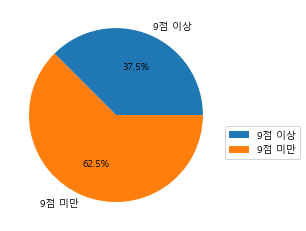

In [153]:
# filter
filt = df['평점'] >= 9.0
display(df[filt])
display(df[~filt])

values = [len(df[filt]), len(df[~filt])]
labels = ['9점 이상', '9점 미만']

plt.pie(values, labels = labels,
        autopct = '%.1f%%')

plt.legend(loc = (1, 0.3))

plt.show()